#How Good is your Model?# 

This is a version of the homework that I did with more frequent sampling of the data to see whether or not it was raining. I was a bit suprised that the results didn't change as much as I thought and the accuracy supposedly went down. I'll be asking about this next class. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
import requests
#from wwo_hist import retrieve_hist_data

import os
print(os.listdir("C:/input"))
os.chdir("C:/input")


['boise.csv']


In [2]:
#direct filepath to .csv will have to be edited to wherever .csv is on disk
rainData = pd.read_csv('C:/input/boise.csv')
rainData.sample(5)

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,label
207,1/26/19 21:00,30,17,0,11.1,7,59,No moonrise,11:45 AM,7:23 AM,...,27,24,10,32,79,0.0,1016,24,10,0
2881,12/27/19 3:00,25,19,0,11.0,5,0,8:30 AM,7:48 PM,7:18 AM,...,20,20,6,42,95,0.0,1013,20,2,0
2188,10/1/19 12:00,29,20,0,10.2,7,12,9:28 AM,9:14 PM,6:38 AM,...,32,29,5,22,63,0.0,1010,29,10,0
1817,8/16/19 3:00,31,21,0,9.0,6,100,8:16 PM,7:18 AM,6:29 AM,...,26,23,4,30,85,0.0,1017,23,10,0
2268,10/11/19 12:00,30,20,0,8.8,6,85,5:30 PM,4:48 AM,6:40 AM,...,31,29,6,7,59,0.0,1011,29,10,0


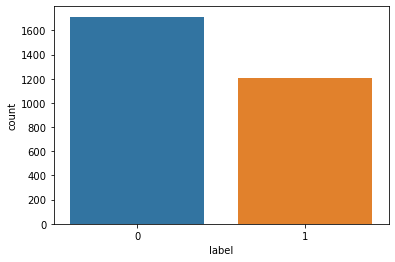

In [3]:
ax = sns.countplot(x="label", data=rainData)
#counted anything over 0mm precipitation as rain
#also only took a sample of the weather once every 24 hours
#I believe this biases the data towards it usually raining, so my dataset could
#definitely be improved 

In [4]:
feature_cols = ['maxtempC', 'mintempC', 'cloudcover', 'humidity','pressure','tempC','visibility']
X = rainData[feature_cols] # Features
y = rainData.label # Target variable

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

In [6]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [7]:
X_test

,maxtempC,mintempC,cloudcover,humidity,pressure,tempC,visibility
1542,30,21,17,68,1014,25,10
700,29,19,74,46,1015,29,19
987,34,21,10,56,1017,28,10
577,32,19,20,87,1016,19,10
2043,31,22,6,73,1014,29,10
...,...,...,...,...,...,...,...
2048,31,22,78,92,1014,23,10
1633,31,22,27,88,1016,23,10
1576,31,21,81,89,1017,23,10
1484,31,22,12,48,1018,31,10


In [8]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#This accuracy seems artificially high 

Accuracy: 0.9232876712328767


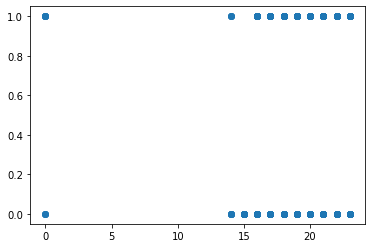

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X['mintempC'],y)
plt.show()

[]

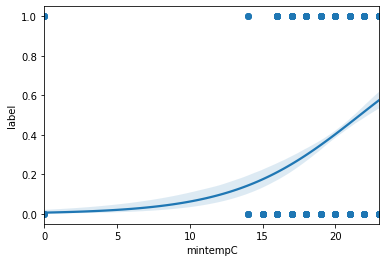

In [10]:
import seaborn as sns
sns.regplot(x = "mintempC", y = "label", data=rainData, logistic = True)
plt.plot()

Text(0.5, 0, 'Importance')

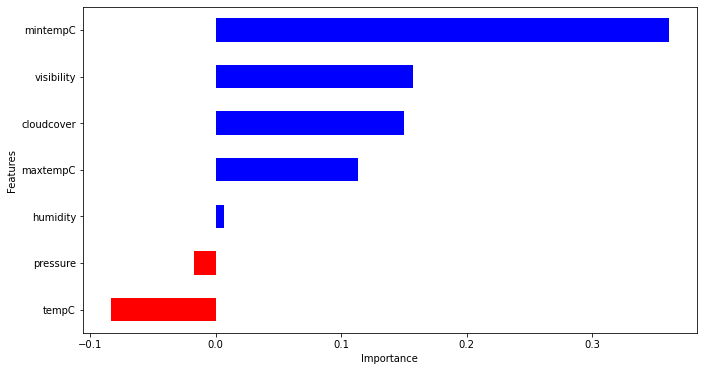

In [11]:
from matplotlib import pyplot as plt
coeff = list(logreg.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

frequency = 24
start_date = '1-JAN-2019'
end_date = '31-DEC-2019'
api_key = 'efbb9bbcd1e4494ea8600432201809'
location_list = ['boise']
hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)
                                
#Code I used for the API request, I installed a module called retrieve_hist_data that searches an api called world weather online 

#How Good is your Model?# 

This is a version of the homework that I did with more frequent sampling of the data to see whether or not it was raining. I was a bit suprised that the results didn't change as much as I thought and the accuracy supposedly went down. 